In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
# 0 = all messages are logged (default behavior)
#1 = INFO messages are not printed
#2 = INFO and WARNING messages are not printed
#3 = INFO, WARNING, and ERROR messages are not printed

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers

# Import Data, Explore and identify relevant features 

In [2]:
# Import data
#!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
dataset.shape

(1338, 7)

In [6]:
# Check null values in the dataset 

dataset.isnull()

,age,sex,bmi,children,smoker,region,expenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [7]:
# Count null values in the dataset

dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
# No null values 

In [8]:
# To be able to pass into a ML model we need to convert the stringy coloumns to numerical values 

dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Handling Stringy Coloumns 

In [9]:
# i.e sex, smoker, region coloumns 

dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
dataset['sex'] = dataset['sex'].map({'female':0,'male':1})

In [11]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [12]:
dataset['smoker']=dataset['smoker'].map({'yes': 1,'no':0})

In [ ]:
# Lets use one hot encoding for the 'region' feature 

In [13]:
dataset.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [14]:
pd.get_dummies(dataset.region, prefix='region')

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [15]:
# Now add the four new coloumns with one hot encoding defined above and drop the original 'region' coloumn

dataset = dataset.join(pd.get_dummies(dataset.region, prefix='region')).drop('region',axis=1)

dataset.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0


In [ ]:
# Now look for correlations between different feature coloumns using .corr() and visualize it using seaborn library

<AxesSubplot:>

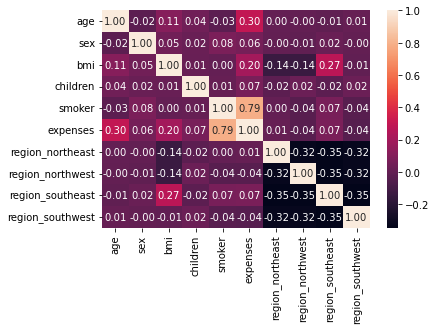

In [16]:
sns.heatmap(dataset.corr(),annot=True, fmt='.2f')

In [ ]:
#annot = True writes the correlation value in each cell and we show them upto two decimal points 

In [ ]:
# We observe that the children number, sex and the region weakly correlates with the health expenses
# So we can drop them from our data set before training the model 

In [17]:
dataset = dataset.drop(['sex','children','region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1)

In [18]:
dataset.head()

,age,bmi,smoker,expenses
0,19,27.9,1,16884.92
1,18,33.8,0,1725.55
2,28,33.0,0,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


## Splitting the data into training and test sets 

In [19]:
dataset = dataset.sample(frac=1) # First shuffle the rows of the dataset to not to create a bias

In [20]:
per_cut = int(len(dataset)*0.2) # Total number of rows to be dedicated to the training set 

In [21]:
train_set = dataset[:-per_cut] # Pick the first 80 percent of the rows as the training set and the rest as test set
test_set = dataset[-per_cut:]

In [22]:
print(len(dataset),len(train_set),len(test_set))

1338 1071 267


In [23]:
if len(dataset) == len(train_set) + len(test_set):
    print('Splitting is done correctly')
else:
    print('Splitting is not done correctly')

Splitting is done correctly


In [24]:
train_set.head()

,age,bmi,smoker,expenses
1319,39,26.3,0,7201.70
850,37,30.8,1,37270.15
1075,32,29.6,0,4562.84
1103,58,36.1,0,11363.28
424,48,30.2,0,8968.33


In [25]:
test_set.head()

,age,bmi,smoker,expenses
437,35,28.9,0,5926.85
421,61,35.9,1,46599.11
37,26,20.8,0,2302.30
476,24,28.5,1,35147.53
61,25,33.7,0,4504.66


In [ ]:
# Now split the labels: 'expenses' from both of the sets 

In [26]:
train_labels = train_set['expenses']
train_dataset = train_set.drop('expenses', axis = 1)

test_labels = test_set['expenses']
test_dataset = test_set.drop('expenses', axis = 1)

In [27]:
train_labels.head()

1319     7201.70
850     37270.15
1075     4562.84
1103    11363.28
424      8968.33
Name: expenses, dtype: float64

In [28]:
train_dataset.head()

,age,bmi,smoker
1319,39,26.3,0
850,37,30.8,1
1075,32,29.6,0
1103,58,36.1,0
424,48,30.2,0


In [29]:
len(train_dataset.keys())

3

# Create and compile a NN Model 

In [30]:
NNmodel = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(len(train_dataset.keys()),)),  #Input shape should be the number of coloumns
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
NNmodel.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate = 0.1),
    loss='mse',
    metrics=['mae', 'mse']
)
NNmodel.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 3)                12        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,381
Trainable params: 2,375
Non-trainable params: 6
_________________________________________________________________


# Train the Model with training dataset and labels

In [31]:
history = NNmodel.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.5,
    verbose=0, # disable logging
)

print(history)

## Evaluate the model with the test data set

In [32]:
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = NNmodel.evaluate(test_dataset, test_labels, verbose=2)

9/9 - 0s - loss: 19271952.0000 - mae: 2527.3008 - mse: 19271952.0000 - 32ms/epoch - 4ms/step


Testing set Mean Abs Error: 2527.30 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 1ms/step


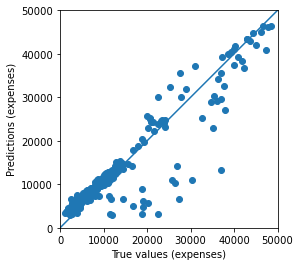

In [33]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
    print("You passed the challenge. Great job!")
else:
    print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = NNmodel.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)